In [72]:
using MAT
using LinearAlgebra
vars = matread("./data/LST_matlab_linux.mat")

Dict{String, Any} with 44 entries:
  "fontsize_"  => 12.0
  "Ri"         => 0.0
  "omega"      => ComplexF64[0.666627-49.3447im; 0.666625-46.1096im; … ; 0.6679…
  "__opaque__" => Dict{String, Any}("s1"=>Int8[77, 67, 79, 83], "arr"=>("", UIn…
  "y_phys"     => [1.0; 0.999966; … ; -0.999966; -1.0;;]
  "aa"         => 145.0
  "Upp"        => [-2.0; -2.0; … ; -2.0; -2.0;;]
  "sp"         => [1.0; 2.0; … ; 1128.0; 1130.0;;]
  "D4p"        => [0.0 0.0 … 4.31793e18 4.4092e18; 0.0 0.0 … 2.42736e18 2.47074…
  "eta"        => ComplexF64[0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0…
  "tmp"        => 0.0
  "Up"         => [-2.0; -1.99993; … ; 1.99993; 2.0;;]
  "U"          => [0.0; 6.7281e-5; … ; 6.7281e-5; 0.0;;]
  "y_top"      => 1.0
  "epsilon"    => 0.0001
  "bf"         => 2.0
  "u"          => ComplexF64[-3.80579e-6+5.44119e-6im 4.83827e-6-1.79199e-5im ……
  "Ra"         => 0.0
  "Pr"         => 0.71
  ⋮            => ⋮

In [73]:
N = 384
y_phys                = cos.(LinRange(0, pi, N))

T = inv(vars["B"]) * vars["A"]
lambda = eigvals(T)
vecs = eigvecs(T)

1152×1152 Matrix{ComplexF64}:
         0.0-0.0im          …  0.0+0.0im     0.187905+0.145684im
         0.0-0.0im             0.0+0.0im     0.968975+0.0im
         0.0-0.0im             0.0+0.0im    0.0443659+0.0216235im
         0.0-0.0im             0.0+0.0im    0.0340034+0.00235871im
         0.0-0.0im             0.0+0.0im   0.00467092-0.0102688im
         0.0-0.0im          …  0.0+0.0im  -0.00386434+0.00251234im
         0.0-0.0im             0.0+0.0im   0.00332229-0.0106606im
         0.0-0.0im             0.0+0.0im  -0.00403616+0.00258741im
         0.0-0.0im             0.0+0.0im   0.00261275-0.0102746im
         0.0-0.0im             0.0+0.0im  -0.00365252+0.0026608im
            ⋮               ⋱     ⋮       
    0.125009-1.08419e-13im     0.0+0.0im          0.0+0.0im
 1.56018e-10-7.24993e-15im     0.0+0.0im          0.0+0.0im
    0.125255-7.21186e-14im  …  0.0+0.0im          0.0+0.0im
 1.56278e-10-7.26278e-15im     0.0+0.0im          0.0+0.0im
    0.125432-3.59549e-14im     

In [74]:
omega = 1im*lambda   # eigenvalues omega in vector form


sp = (abs.(omega) .> 1e-10) .* ( abs.(omega) .<50)

omega = omega[sp]
vecs = vecs[:, sp]

1152×169 Matrix{ComplexF64}:
 0.0+0.0im      0.599832+0.0im          …  0.0+0.0im
 0.0+0.0im    1.1719e-11+6.57165e-11im     0.0+0.0im
 0.0+0.0im     0.0458718+0.00464914im      0.0+0.0im
 0.0+0.0im  -1.18226e-12+6.89885e-12im     0.0+0.0im
 0.0+0.0im    -0.0952772+2.8778e-5im       0.0+0.0im
 0.0+0.0im  -5.10896e-12-5.32941e-12im  …  0.0+0.0im
 0.0+0.0im     -0.106483-0.000177117im     0.0+0.0im
 0.0+0.0im  -1.83906e-13-2.60942e-12im     0.0+0.0im
 0.0+0.0im     -0.116305-0.000208232im     0.0+0.0im
 0.0+0.0im  -1.37789e-13-4.24937e-14im     0.0+0.0im
    ⋮                                   ⋱  
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im          …  0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0

In [75]:
omega - vars["omega"]

169×1 Matrix{ComplexF64}:
    9.66986917515511e-5 - 0.008459556739303764im
  2.5794202831441737e-6 - 3.235067974015898im
 0.00012686839210962475 - 5.290018714934071im
    0.22983160629271232 - 47.59837787544295im
  1.2192241993780328e-8 - 9.697380676243483e-9im
 0.00013360754659985652 - 6.394383577306698im
  -8.901169265074227e-5 - 1.5909946321580648im
   9.045742989211014e-6 - 9.047252247206984im
   -0.07509763777097433 - 44.28913424350875im
 0.00020600740028120512 - 10.26115279207874im
                        ⋮
   0.056173074123281985 + 1.671272723398634im
    -0.1122777301241944 + 3.5161162744179184im
    0.06750174737085335 + 7.463714240941605im
    0.14673794777324567 + 4.750770675899103im
   0.026354414572417717 + 12.88847360509265im
     0.1796384422011773 + 10.936537717049536im
   -0.23533197547564438 + 9.249655270159382im
     0.2695572995663731 + 6.189232223925428im
    0.26833986813622035 + 24.97353025782965im

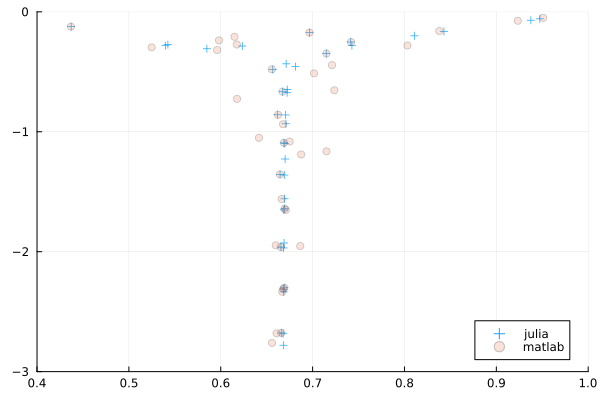

In [76]:
using Plots
scatter(real(omega), imag(omega), label="julia", markeralpha=0.8, marker=:cross, ylims=(-3, 0), xlims=(0.4, 1))
scatter!(real(vars["omega"]), imag(vars["omega"]), label="matlab", markeralpha=0.2)

["lesgo_v", "lambda", "lst", "lesgo_A"]

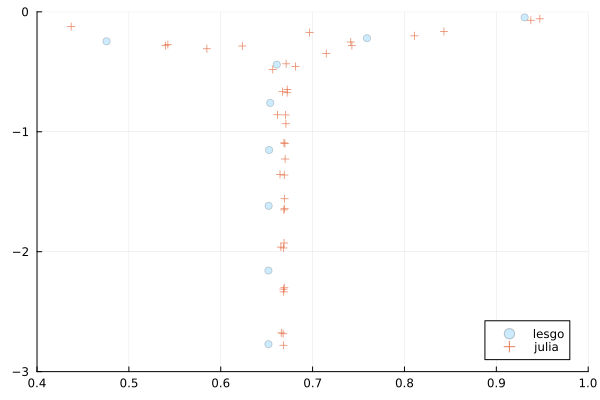

In [77]:
lesgo_vars = matread("./data/lesgo.mat")
print(keys(lesgo_vars))
lesgo_eigvals = log.(eigvals(lesgo_vars["lesgo_A"]))/1e-5/1im * -1
lesgo_eigvecs = eigvecs(lesgo_vars["lesgo_A"])


scatter(real(lesgo_eigvals), imag(lesgo_eigvals), label="lesgo", markeralpha=0.2)
scatter!(real(omega), imag(omega), label="julia", markeralpha=0.8, marker=:cross, xlims=(0.4, 1), ylims=(-3, 0))


In [78]:
z_range = [0, 1]
str_factor = 1.5

z = LinRange(z_range[1], z_range[2], 128+1)
zc = 0.5 * z[2:end] + 0.5 * z[1:end-1]
z_stretch = z_range[2]*(1 .+(tanh.(str_factor*(zc/z_range[2].-1))/tanh(str_factor)))

128-element Vector{Float64}:
 0.0011760076389470964
 0.0035657182714554647
 0.006006481701219646
 0.008499259512988244
 0.011045025530152075
 0.013644765689732608
 0.016299477900310833
 0.019010171882164473
 0.021777868988868132
 0.024603602009601544
 ⋮
 0.890314946151267
 0.903148450695916
 0.9160083494910825
 0.9288911818667667
 0.941793462183158
 0.9547116835733297
 0.9676423217350443
 0.9805818387630091
 0.9935266870127616

In [79]:
# remove bad eigenvalues
sp = (abs.(omega).>1e-10) .*  (abs.(omega).<50)

omega = omega[sp]
vecs = vecs[:, sp]

1152×169 Matrix{ComplexF64}:
 0.0+0.0im      0.599832+0.0im          …  0.0+0.0im
 0.0+0.0im    1.1719e-11+6.57165e-11im     0.0+0.0im
 0.0+0.0im     0.0458718+0.00464914im      0.0+0.0im
 0.0+0.0im  -1.18226e-12+6.89885e-12im     0.0+0.0im
 0.0+0.0im    -0.0952772+2.8778e-5im       0.0+0.0im
 0.0+0.0im  -5.10896e-12-5.32941e-12im  …  0.0+0.0im
 0.0+0.0im     -0.106483-0.000177117im     0.0+0.0im
 0.0+0.0im  -1.83906e-13-2.60942e-12im     0.0+0.0im
 0.0+0.0im     -0.116305-0.000208232im     0.0+0.0im
 0.0+0.0im  -1.37789e-13-4.24937e-14im     0.0+0.0im
    ⋮                                   ⋱  
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im          …  0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0.0im             0.0+0.0im
 0.0+0.0im           0.0-0

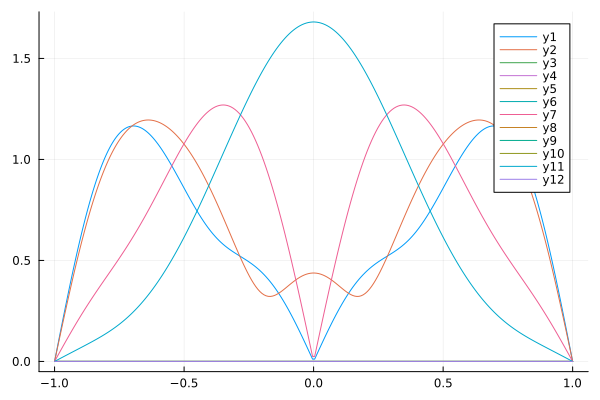

In [80]:
plot(y_phys, abs.(q[:, 158:end]))

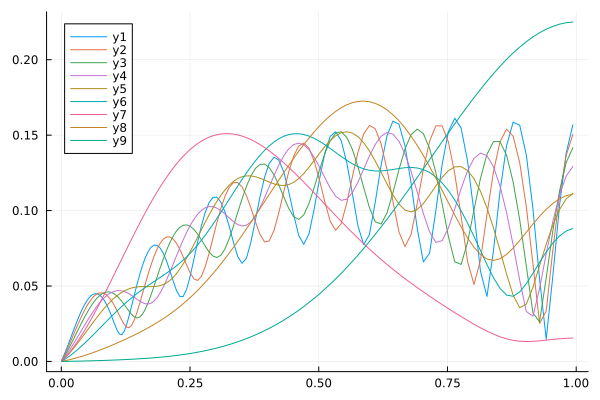

In [81]:
plot(z_stretch, abs.(lesgo_eigvecs[:, 120:end]))

0.9375566247720164 - 0.07056658670419605im0.930822739998459 - 0.04644035658978944im

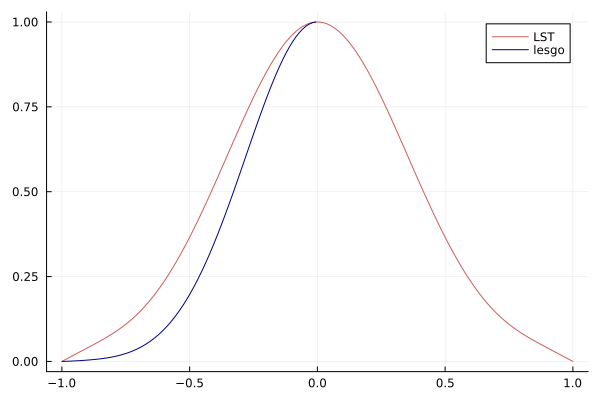

In [82]:
ind = 168
lesgo_ind = 128
q = vars["D0p"] * vecs[2*N+1:3*N, :]

print(omega[ind])
print(lesgo_eigvals[lesgo_ind])
plot(y_phys, abs.(q[:, ind])/maximum(abs.(q[:, ind])), label="LST", color="indianred")
plot!(z_stretch.-1, abs.(lesgo_eigvecs[:, lesgo_ind])/maximum(abs.(lesgo_eigvecs[:, lesgo_ind])), label="lesgo", color="navy")


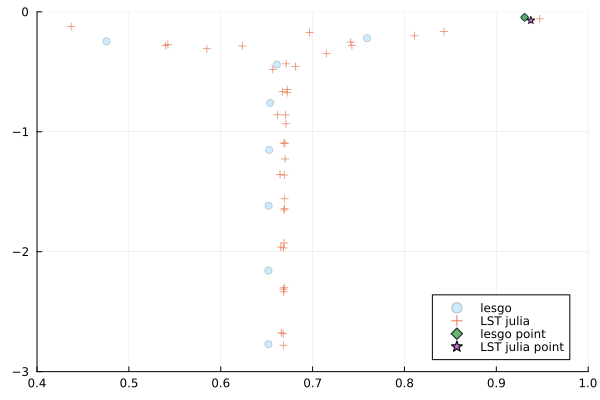

In [83]:
scatter(real(lesgo_eigvals), imag(lesgo_eigvals), label="lesgo", markeralpha=0.2)
scatter!(real(omega), imag(omega), label="LST julia", markeralpha=0.8, marker=:cross, xlims=(0.4, 1), ylims=(-3, 0))
scatter!([real(lesgo_eigvals[lesgo_ind])], [imag(lesgo_eigvals[lesgo_ind])], label="lesgo point", markeralpha=0.8, marker=:diamond)
scatter!([real(omega[ind])], [imag(omega[ind])], label="LST julia point", markeralpha=1, marker=:star, xlims=(0.4, 1), ylims=(-3, 0))


0.5848948489583061 - 0.30793466106345097im0.47567973922902124 - 

0.24608173687468465im

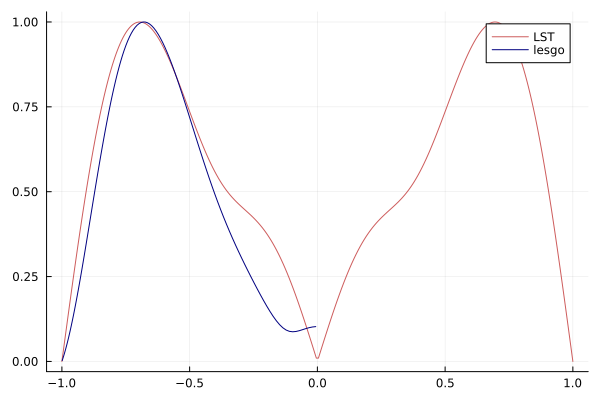

In [84]:
ind = 158
lesgo_ind = 126
q = vars["D0p"] * vecs[2*N+1:3*N, :]

print(omega[ind])
print(lesgo_eigvals[lesgo_ind])
plot(y_phys, abs.(q[:, ind])/maximum(abs.(q[:, ind])), label="LST", color="indianred")
plot!(z_stretch.-1, abs.(lesgo_eigvecs[:, lesgo_ind])/maximum(abs.(lesgo_eigvecs[:, lesgo_ind])), label="lesgo", color="navy")


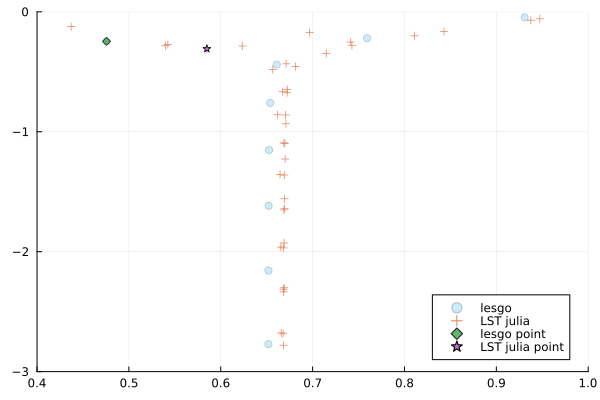

In [85]:
scatter(real(lesgo_eigvals), imag(lesgo_eigvals), label="lesgo", markeralpha=0.2)
scatter!(real(omega), imag(omega), label="LST julia", markeralpha=0.8, marker=:cross, xlims=(0.4, 1), ylims=(-3, 0))
scatter!([real(lesgo_eigvals[lesgo_ind])], [imag(lesgo_eigvals[lesgo_ind])], label="lesgo point", markeralpha=0.8, marker=:diamond)
scatter!([real(omega[ind])], [imag(omega[ind])], label="LST julia point", markeralpha=1, marker=:star, xlims=(0.4, 1), ylims=(-3, 0))


0.6234682085750353 - 0.28483715454795355im0.759180034838523 - 0.22000113162655752im

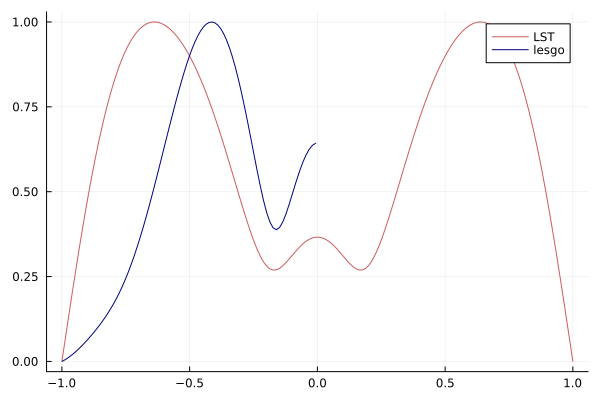

In [86]:
ind = 159
lesgo_ind = 127
q = vars["D0p"] * vecs[2*N+1:3*N, :]

print(omega[ind])
print(lesgo_eigvals[lesgo_ind])
plot(y_phys, abs.(q[:, ind])/maximum(abs.(q[:, ind])), label="LST", color="indianred")
plot!(z_stretch.-1, abs.(lesgo_eigvecs[:, lesgo_ind])/maximum(abs.(lesgo_eigvecs[:, lesgo_ind])), label="lesgo", color="navy")


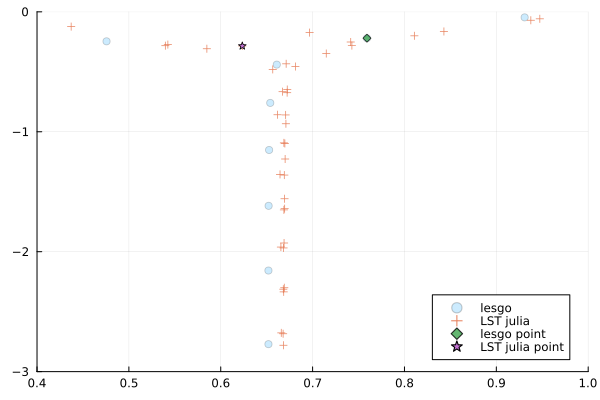

In [87]:
scatter(real(lesgo_eigvals), imag(lesgo_eigvals), label="lesgo", markeralpha=0.2)
scatter!(real(omega), imag(omega), label="LST julia", markeralpha=0.8, marker=:cross, xlims=(0.4, 1), ylims=(-3, 0))
scatter!([real(lesgo_eigvals[lesgo_ind])], [imag(lesgo_eigvals[lesgo_ind])], label="lesgo point", markeralpha=0.8, marker=:diamond)
scatter!([real(omega[ind])], [imag(omega[ind])], label="LST julia point", markeralpha=1, marker=:star, xlims=(0.4, 1), ylims=(-3, 0))


In [88]:
using Dash
# external_stylesheets = 'https://codepen.io/chriddyp/pen/bWLwgP.css'

app = dash()
# app = Dash(__name__, external_stylesheets=external_stylesheets)


app.layout = html_div() do
    html_div(
        children = [
            html_div(
                children = [
                    "Layer Number: ",
                    dcc_input(id='layer_number', value=384, type='number'),
                    ], style = Dict('width' => '49%', 'display' => 'inline-block', 'padding' => '0 20'),
            ),

            html_div(
                children = [
                    "Point Index: ",
                    dcc_input(id='point_index', value=0, type='number')
                ], style = Dict('width' => '49%', 'display' => 'inline-block'),
            ),
        ],

    ),
end

run_server(app, "0.0.0.0", debug=true)

ErrorException: syntax: character literal contains multiple characters

In [89]:
using Dash

app = dash()

app.layout = html_div() do
    html_h6("Change the value in the text box to see callbacks in action!"),
    html_div(
        children = [
            "Input: ",
            dcc_input(id = "my-input", value = "initial value", type = "text")
        ],
    ),
    html_br(),
    html_div(id = "my-output")
end

callback!(app, Output("my-output", "children"), Input("my-input", "value")) do input_value
    "Output: $(input_value)"
end

run_server(app, "0.0.0.0", debug=true)


Base.IOError: IOError: listen: address already in use (EADDRINUSE)